In [1]:
import math
import numpy as np
import scipy.stats
from scipy.stats import beta
from scipy.stats import binom
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

# this will make plots a little bit prettier
sns.set(style='darkgrid')
sns.set_context('talk')

d:\Miniconda\envs\datascience\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

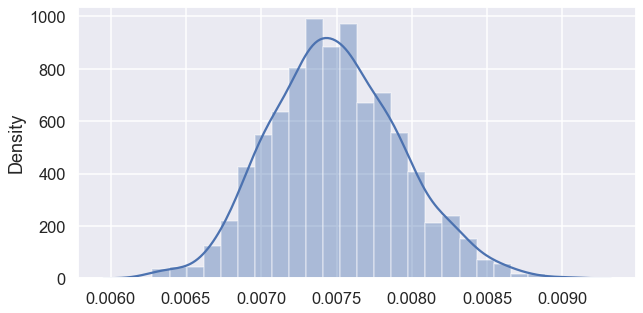

In [2]:
# Estimating the Conversion Rate for Email Signup List
a = 300
b = 39700

r = beta.rvs(a, b, size=1000)

fig, ax = plt.subplots(figsize = (10, 5))
sns.distplot(r, ax=ax)

The probability of the actual rate being lower than 0.0065

In [3]:
x = [0, 0.0065]
lowb= beta.sf(x, a, b)[0] - beta.sf(x, a, b)[1] 
lowb

0.007978686170755811

The probability of conversion rate being higher than expected (0.0085 or higher)

In [4]:
x = [0.0085, 1]
highb = beta.sf(x, a, b)[0] - beta.sf(x, a, b)[1] 
highb

0.01248151030103659

In [5]:
ratio = highb/lowb
ratio

1.5643565912875392

Code shown in the book as "Using the CDF in R"

In [6]:
beta.cdf(0.0065, 300, 39700)

0.00797868617075586

In [7]:
beta.cdf(1, 300, 39700) - beta.cdf(0.0085, 300, 39700)

0.012481510301036614

Calculating Quantiles in <s>R</s> Python :)

In [8]:
beta.ppf(0.999, 300, 39700)

0.008903462119425339

Finding 95% CI 

In [9]:
lower_bound = beta.ppf(0.025, 300, 39700)
upper_bound = beta.ppf(0.975, 300, 39700)
print("LB: ", lower_bound, " ", "UP: ", upper_bound)

LB:  0.0066780740443999455   UP:  0.008368562363890978


### 1. Using the code example for plotting the PDF on page 127, plot the CDF and quantile functions.

CDF Beta(300, 39700)

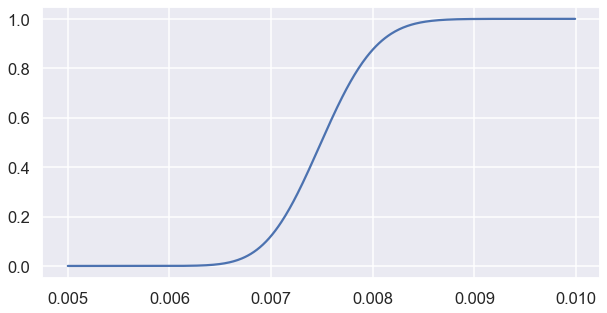

In [12]:
X = np.arange(0.005, 0.01, 0.00001)
Y = beta.cdf(X, 300, 39700)

fig, ax = plt.subplots(figsize = (10, 5))
ax.plot(X, Y)

### Quantile Beta(300, 39700)

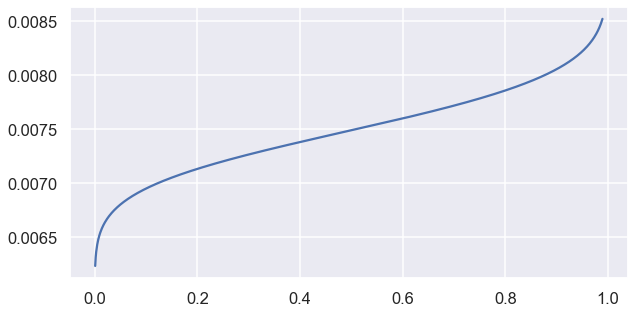

In [13]:
X = np.arange(0.001, 0.99, 0.001)
Y = beta.ppf(X, 300, 39700)

fig, ax = plt.subplots(figsize = (10, 5))
ax.plot(X, Y)

### 2. Returning to the task of measuring snowfall from Chapter 10, say you have the following measurements (in inches) of snowfall:
### 7.8, 9.4, 10.0, 7.9, 9.4, 7.0, 7.0, 7.1, 8.9, 7.4
### What is your 99.9 percent confidence interval for the true value of snowfall?

In [14]:
vals = np.array([7.8, 9.4, 10.0, 7.9, 9.4, 7.0, 7.0, 7.1, 8.9, 7.4])
mu = vals.mean()
sigma = vals.std(ddof=1)   # this argument is required to achieve same results as in R, since we are calculating sd for samples
                           # and not for the population - by default ddof is 0 and it is calculating sd for population

In [15]:
lower_bound = norm.ppf(0.0005, loc=mu, scale=sigma)
upper_bound = norm.ppf(0.9995, loc=mu, scale=sigma)
print("LB: ", lower_bound, " ", "UP: ", upper_bound)

LB:  4.456061591417175   UP:  11.923938408582863


### 3. A child is going door to door selling candy bars. So far she has visited 30 houses and sold 10 candy bars. She will visit 40 more houses today. What is the 95 percent confidence interval for how many candy bars she will sell the rest of the day? 

In [17]:
a = 10
b = 20

In [18]:
upper_bound = beta.ppf(0.975, a, b)
lower_bound = beta.ppf(0.025, a, b)
print("LB: ", lower_bound, " ", "UP: ", upper_bound)



LB:  0.17938364923511183   UP:  0.50832335380999


In [21]:

# For 40 additional home visit
lower_bound = 40 * 0.18
upper_bound = 40 * 0.51
print("LB: ", round(lower_bound), " ", "UP: ", round(upper_bound))


LB:  7   UP:  20
